In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

import geopandas as gpd
from shapely.geometry import Point

from PIL import Image
from io import BytesIO

In [2]:
with open('data/api_keys.json', 'r') as file:
    keys = json.load(file)

maps_api_key = keys['Google']
geonames_username = keys['Geonames']

In [3]:
collisions = pd.read_csv('data/processed/collisions_all.csv', low_memory=False)
intersections = pd.read_csv('data/reference/int_flags_deduped.csv')
site_int_dict = pd.read_csv('data/reference/site_int_dict.csv')

In [4]:
print(
    f'Collisions shape: {collisions.shape}\n'
    f'Intersections shape: {intersections.shape}\n'
    f'Site Int Dict shape: {site_int_dict.shape}'
)

Collisions shape: (4898524, 50)
Intersections shape: (39162, 21)
Site Int Dict shape: (86593, 5)


In [5]:
merged = pd.merge(collisions, site_int_dict, left_on=['LATITUDE', 'LONGITUDE'], right_on=['lat', 'lng'], how='left')
merged.shape

(4898524, 55)

In [6]:
merged.dropna(subset=['lat']).shape

(3306340, 55)

In [7]:
merged[['LATITUDE', 'LONGITUDE', 'lat', 'lng']].head(10)

,LATITUDE,LONGITUDE,lat,lng
0,40.691080,-73.729110,40.691080,-73.729110
1,40.703957,-73.895700,40.703957,-73.895700
2,40.721040,-73.954300,NaN,NaN
3,40.605682,-74.139760,40.605682,-74.139760
4,40.695847,-73.908806,40.695847,-73.908806
5,40.638603,-73.948270,40.638603,-73.948270
6,40.832573,-73.910520,40.832573,-73.910520
7,40.855920,-73.917200,40.855920,-73.917200
8,40.726116,-74.001600,40.726116,-74.001600
9,40.697310,-73.932274,40.697310,-73.932274


In [8]:
merged = merged.dropna(subset=['lat'])
merged.shape

(3306340, 55)

In [9]:
merged[['LATITUDE', 'LONGITUDE', 'lat', 'lng']].head(10)

,LATITUDE,LONGITUDE,lat,lng
0,40.691080,-73.729110,40.691080,-73.729110
1,40.703957,-73.895700,40.703957,-73.895700
3,40.605682,-74.139760,40.605682,-74.139760
4,40.695847,-73.908806,40.695847,-73.908806
5,40.638603,-73.948270,40.638603,-73.948270
6,40.832573,-73.910520,40.832573,-73.910520
7,40.855920,-73.917200,40.855920,-73.917200
8,40.726116,-74.001600,40.726116,-74.001600
9,40.697310,-73.932274,40.697310,-73.932274
11,40.758305,-73.855610,40.758305,-73.855610


In [10]:
merged = pd.merge(merged, intersections, on='dupe_key', how='left')
merged.shape

(3306340, 75)

In [11]:
merged.dropna(subset=['intersection']).shape

(3306340, 75)

In [12]:
merged = merged.dropna(subset=['intersection'])
merged

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,placename,street1Bearing,street2Bearing,adminName2,postalcode,countryCode,street1,street2,adminName1,distance_site_int
0,10249006,4229554,2019-10-26,09:43:00,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,New York,103,201,Queens,11411.0,US,Linden Blvd,233rd St,New York,0.000161
1,10255054,4230587,2019-10-25,15:15:00,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,New York,164,71,Queens,11385.0,US,Fresh Pond Rd,Catalpa Ave,New York,0.000095
2,6650180,3565527,2016-11-21,13:05:00,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,New York,265,175,Richmond,10314.0,US,Westwood Ave,Martin Ave,New York,0.000277
3,10253606,4230743,2019-10-24,19:15:00,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,19143343.0,27.0,Not Ejected,...,New York,36,126,Kings,11237.0,US,Jefferson Ave,Irving Ave,New York,0.000098
4,10251336,4230047,2019-10-26,16:45:00,21064a07-a945-49d0-af97-5446801b20ce,Occupant,Unspecified,19142198.0,41.0,NaN,...,New York,85,175,Kings,11210.0,US,Foster Ave,Nostrand Ave,New York,0.000150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306335,13075253,4700981,2024-02-07,19:01:00,02812d77-0651-4ec8-b16f-92ef8e973440,Occupant,Unspecified,20705667.0,55.0,Not Ejected,...,New York,53,11,New York,NaN,US,E 23rd St,Ave C,New York,0.000437
3306336,13075821,4749919,2024-08-20,20:00:00,58c85c87-a0d3-4159-ae7b-224bbb4f2a4f,Occupant,Unspecified,20706007.0,45.0,Not Ejected,...,New York,221,128,Kings,11220.0,US,3rd Ave,49th St,New York,0.000478
3306337,13075602,4738538,2024-07-04,20:16:00,b57fa6a3-9577-4e59-ac93-fe407bbdce58,Pedestrian,Injured,NaN,14.0,NaN,...,New York,138,242,Queens,NaN,US,Woodhaven Blvd,Forest Park Dr,New York,0.000114
3306338,13075819,4749919,2024-08-20,20:00:00,06060ebf-1117-4a31-a3e8-efae535d1493,Occupant,Unspecified,20706007.0,36.0,Not Ejected,...,New York,221,128,Kings,11220.0,US,3rd Ave,49th St,New York,0.000478


In [13]:
merged[merged.dupe_key == '40.88_-73.848331']

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,placename,street1Bearing,street2Bearing,adminName2,postalcode,countryCode,street1,street2,adminName1,distance_site_int
66432,7857804,3796297,2017-11-22,07:56:00,5b9bb14b-01a8-4bcd-a0a6-bb838eb80b04,Occupant,Unspecified,17958922.0,52.0,Not Ejected,...,New York,130,56,Bronx,10469.0,US,E 221st St,Needham Ave,New York,0.00011
109002,6932843,3648686,2017-04-09,23:25:00,27f42319-3f18-4e50-a585-7b85a0902d9e,Occupant,Injured,17509086.0,55.0,Not Ejected,...,New York,130,56,Bronx,10469.0,US,E 221st St,Needham Ave,New York,0.00011
132775,7857803,3796297,2017-11-22,07:56:00,00106500-7ce3-4b4f-a04d-3637c9d667cd,Occupant,Unspecified,17958921.0,22.0,NaN,...,New York,130,56,Bronx,10469.0,US,E 221st St,Needham Ave,New York,0.00011
432229,7857805,3796297,2017-11-22,07:56:00,ba0f2c10-9603-45d2-8f73-b8330abd9dc1,Occupant,Unspecified,17958922.0,52.0,NaN,...,New York,130,56,Bronx,10469.0,US,E 221st St,Needham Ave,New York,0.00011
465630,9429900,3937528,2018-07-06,17:50:00,0a4d2f80-006d-4013-8dca-25450d8c8fbb,Occupant,Unspecified,18734194.0,31.0,NaN,...,New York,130,56,Bronx,10469.0,US,E 221st St,Needham Ave,New York,0.00011
469034,9668850,4028375,2018-11-18,12:00:00,cf2b04d5-5f0e-4188-b2d5-b2a6623105a0,Occupant,Unspecified,18852208.0,41.0,NaN,...,New York,130,56,Bronx,10469.0,US,E 221st St,Needham Ave,New York,0.00011
542472,10004364,4172576,2019-07-01,13:00:00,47454ceb-1b3e-47cc-9027-35e3d3810cee,Occupant,Injured,19018279.0,56.0,Ejected,...,New York,130,56,Bronx,10469.0,US,E 221st St,Needham Ave,New York,0.00011
614080,10004363,4172576,2019-07-01,13:00:00,fa9e2c8a-76ab-4102-a402-ce1e884f5835,Occupant,Unspecified,19018278.0,0.0,NaN,...,New York,130,56,Bronx,10469.0,US,E 221st St,Needham Ave,New York,0.00011
614637,7349068,3832423,2018-01-20,20:00:00,54ae14f3-c981-4be8-8332-60e173bd45a4,Occupant,Unspecified,17709955.0,0.0,NaN,...,New York,130,56,Bronx,10469.0,US,E 221st St,Needham Ave,New York,0.00011
742893,10099727,4194683,2019-08-23,14:30:00,d74a1c62-4935-41ba-9ca2-59611a8b8cc3,Occupant,Injured,19066160.0,21.0,Not Ejected,...,New York,130,56,Bronx,10469.0,US,E 221st St,Needham Ave,New York,0.00011


In [14]:
merged[merged.street1 == 'E 221st St'].street2.value_counts()

street2
White Plains Rd    94
Paulding Ave       53
Needham Ave        31
Oakley St          10
Name: count, dtype: int64

In [15]:
merged.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT',
       'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
       'PERSON_SEX', 'YEAR', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME',
       'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
    

In [16]:
merged.PERSON_TYPE.value_counts()

PERSON_TYPE
Occupant           3143766
Pedestrian          101608
Bicyclist            53631
Other Motorized       7335
Name: count, dtype: int64

In [17]:
merged.YEAR.value_counts()

YEAR
2018    597480
2017    596807
2019    534205
2016    430508
2020    251007
2021    230471
2022    212591
2023    204969
2024    108557
2013     42052
2014     38709
2015     37921
2012     21063
Name: count, dtype: int64

### Update Boroughs Field

In [18]:
unique_ints = merged.dupe_key.unique()
len(unique_ints)

39162

In [19]:
points = pd.DataFrame(unique_ints, columns=['dupe_key'])
points['lat'] = points['dupe_key'].apply(lambda x: float(x.split('_')[0]))
points['lng'] = points['dupe_key'].apply(lambda x: float(x.split('_')[1]))
points['geometry'] = points.apply(lambda row: Point(row['lng'], row['lat']), axis=1)
points = gpd.GeoDataFrame(points, crs="EPSG:4326")

shapes = gpd.read_file('data/reference/borough_boundaries.geojson')
boroughs = gpd.sjoin(points, shapes, how='left', predicate='within')

display(boroughs.head())
print(boroughs.shape)

,dupe_key,lat,lng,geometry,index_right,boro_code,boro_name,shape_area,shape_leng
0,40.691081_-73.729103,40.691081,-73.729103,POINT (-73.7291 40.69108),4.0,4,Queens,3041418003.6,888197.010944
1,40.70396_-73.895692,40.703960,-73.895692,POINT (-73.89569 40.70396),4.0,4,Queens,3041418003.6,888197.010944
2,40.605683_-74.139757,40.605683,-74.139757,POINT (-74.13976 40.60568),1.0,5,Staten Island,1623618684.31,325910.306061
3,40.695845_-73.908799,40.695845,-73.908799,POINT (-73.9088 40.69584),0.0,3,Brooklyn,1934142775.63,728147.130565
4,40.638607_-73.948265,40.638607,-73.948265,POINT (-73.94826 40.63861),0.0,3,Brooklyn,1934142775.63,728147.130565


(39162, 9)


In [20]:
merged = pd.merge(merged, boroughs[['dupe_key', 'boro_name']], on='dupe_key', how='left')
merged.shape

(3306340, 76)

In [21]:
merged['boro_name'] = merged['boro_name'].fillna(merged['BOROUGH'].str.title())
merged['boro_name'].value_counts(dropna=False)

boro_name
Brooklyn         1059433
Queens            932273
Manhattan         642852
Bronx             509813
Staten Island     161832
NaN                  137
Name: count, dtype: int64

In [22]:
merged = merged.dropna(subset=['boro_name'])
merged = merged.drop('BOROUGH', axis=1)
merged.shape

(3306203, 75)

In [23]:
merged.to_csv('data/processed/collisions_merged.csv', index=False)

# Generate Features

In [24]:
accidents_by_year = pd.crosstab(merged.dupe_key, merged.YEAR)
accidents_by_year

YEAR,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
dupe_key,,,,,,,,,,,,,
40.498948_-74.244367,0,0,0,0,0,0,0,0,0,0,0,0,1
40.499308_-74.242621,0,0,0,0,0,1,0,0,0,0,0,0,0
40.499478_-74.241727,0,0,0,1,0,0,0,0,0,0,0,0,0
40.499698_-74.237909,0,0,0,0,0,0,0,0,0,0,0,0,3
40.499843_-74.239917,0,0,0,0,0,0,0,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40.912017_-73.899993,0,0,0,0,0,0,3,0,2,0,0,0,0
40.91208_-73.900784,1,0,0,0,0,0,5,19,3,0,0,0,0
40.912223_-73.901674,0,0,0,0,2,0,0,0,3,0,0,0,0


In [25]:
merged['ped_injury_flag'] = merged['NUMBER OF PEDESTRIANS INJURED'].apply(lambda row: row > 0 )
merged['cyc_injury_flag'] = merged['NUMBER OF CYCLIST INJURED'].apply(lambda row: row > 0 )
merged['pedcyc_injury_flag'] = merged.apply(lambda row: row.ped_injury_flag > 0 or row.cyc_injury_flag > 0 , axis=1)
merged['total_injury_flag'] = merged['NUMBER OF PERSONS INJURED'].apply(lambda row: row > 0 )

display(merged['ped_injury_flag'].value_counts())
display(merged['cyc_injury_flag'].value_counts())
display(merged['pedcyc_injury_flag'].value_counts())
display(merged['total_injury_flag'].value_counts())

ped_injury_flag
False    3098846
True      207357
Name: count, dtype: int64

cyc_injury_flag
False    3198644
True      107559
Name: count, dtype: int64

pedcyc_injury_flag
False    2992129
True      314074
Name: count, dtype: int64

total_injury_flag
False    2193085
True     1113118
Name: count, dtype: int64

In [26]:
merged['ped_killed_flag'] = merged['NUMBER OF PEDESTRIANS KILLED'].apply(lambda row: row > 0 )
merged['cyc_killed_flag'] = merged['NUMBER OF CYCLIST KILLED'].apply(lambda row: row > 0)
merged['pedcyc_killed_flag'] = merged.apply(lambda row: row.ped_killed_flag > 0 or row.cyc_killed_flag > 0, axis=1)
merged['total_killed_flag'] = merged['NUMBER OF PERSONS KILLED'].apply(lambda row: row > 0)

display(merged['ped_killed_flag'].value_counts())
display(merged['cyc_killed_flag'].value_counts())
display(merged['pedcyc_killed_flag'].value_counts())
display(merged['total_killed_flag'].value_counts())

ped_killed_flag
False    3302110
True        4093
Name: count, dtype: int64

cyc_killed_flag
False    3305395
True         808
Name: count, dtype: int64

pedcyc_killed_flag
False    3301337
True        4866
Name: count, dtype: int64

total_killed_flag
False    3297804
True        8399
Name: count, dtype: int64

In [27]:
merged['ped_involved_flag'] = merged.apply(lambda row: (
    row.ped_injury_flag or row.ped_killed_flag or row.PERSON_TYPE == 'Pedestrian'
), axis=1)

merged['cyc_involved_flag'] = merged.apply(lambda row: (
    row.cyc_injury_flag or row.cyc_killed_flag or row.PERSON_TYPE == 'Cyclist'
), axis=1)

merged['pedcyc_involved_flag'] = merged.apply(lambda row: row.ped_involved_flag or row.cyc_involved_flag, axis=1)

display(merged['ped_involved_flag'].value_counts())
display(merged['cyc_involved_flag'].value_counts())
display(merged['pedcyc_involved_flag'].value_counts())

ped_involved_flag
False    3090334
True      215869
Name: count, dtype: int64

cyc_involved_flag
False    3197891
True      108312
Name: count, dtype: int64

pedcyc_involved_flag
False    2982966
True      323237
Name: count, dtype: int64

In [28]:
merged_ped = merged[merged['ped_involved_flag']]
merged_cyc = merged[merged['cyc_involved_flag']]
merged_pedcyc = merged[merged['pedcyc_involved_flag']]

ped_accidents_by_year = pd.crosstab(merged_ped.dupe_key, merged_ped.YEAR)
cyc_accidents_by_year = pd.crosstab(merged_cyc.dupe_key, merged_cyc.YEAR)
pedcyc_accidents_by_year = pd.crosstab(merged_pedcyc.dupe_key, merged_pedcyc.YEAR)

display(ped_accidents_by_year)
display(cyc_accidents_by_year)
display(pedcyc_accidents_by_year)

YEAR,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
dupe_key,,,,,,,,,,,,,
40.504116_-74.245201,0,0,0,0,0,0,0,0,0,0,0,3,0
40.504832_-74.241639,0,1,0,0,0,0,0,2,0,1,0,0,0
40.505061_-74.240498,0,0,0,0,0,0,0,3,0,0,0,0,0
40.505527_-74.238181,0,0,0,0,1,0,0,0,0,0,5,0,0
40.506189_-74.234896,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40.910129_-73.903215,0,0,1,0,0,0,8,0,0,0,0,0,3
40.910202_-73.896606,0,0,0,1,0,0,0,0,2,0,0,0,0
40.911239_-73.900087,0,0,0,0,0,0,0,1,0,0,0,0,0


YEAR,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
dupe_key,,,,,,,,,,,,,
40.505013_-74.240733,0,0,0,0,0,0,0,3,0,0,0,0,0
40.505061_-74.240498,0,0,0,0,0,3,0,0,0,0,0,0,0
40.506189_-74.234896,0,0,0,0,0,2,0,0,0,0,0,0,0
40.506756_-74.233063,0,0,0,0,0,0,0,0,3,0,0,0,0
40.50773_-74.230056,0,0,0,0,0,0,0,0,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40.909322_-73.906727,0,0,1,0,0,0,0,0,0,0,0,0,0
40.909618_-73.897684,0,0,0,0,4,0,0,0,0,0,0,0,0
40.909628_-73.896596,0,1,0,1,0,0,0,0,0,0,0,0,0


YEAR,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
dupe_key,,,,,,,,,,,,,
40.504116_-74.245201,0,0,0,0,0,0,0,0,0,0,0,3,0
40.504832_-74.241639,0,1,0,0,0,0,0,2,0,1,0,0,0
40.505013_-74.240733,0,0,0,0,0,0,0,3,0,0,0,0,0
40.505061_-74.240498,0,0,0,0,0,3,0,3,0,0,0,0,0
40.505527_-74.238181,0,0,0,0,1,0,0,0,0,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40.910202_-73.896606,0,0,0,1,0,0,0,0,2,0,0,0,0
40.910924_-73.898282,0,0,0,0,0,4,0,0,0,0,0,0,0
40.911239_-73.900087,0,0,0,0,0,0,0,1,0,0,0,0,0


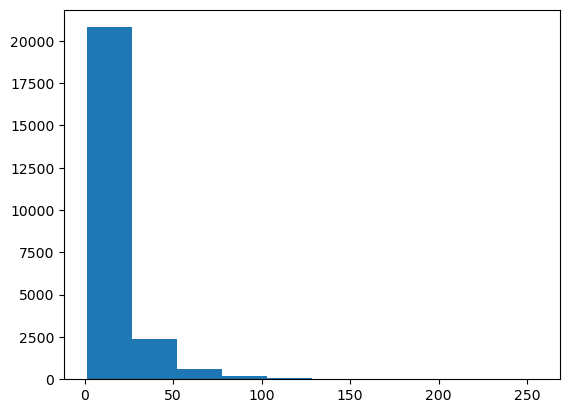

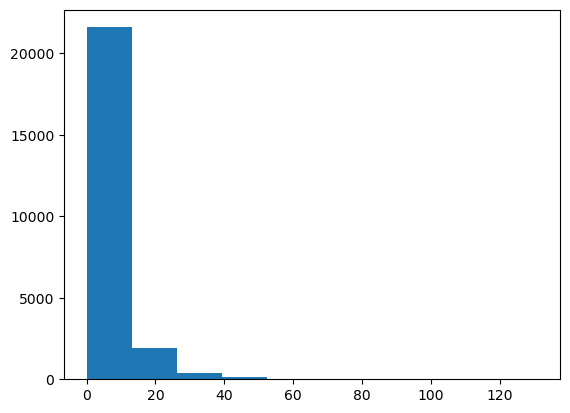

In [29]:
plt.figure()
plt.hist(pedcyc_accidents_by_year.T.sum())
plt.show()

plt.figure()
plt.hist(pedcyc_accidents_by_year[[2020, 2021, 2022, 2023, 2024]].T.sum())
plt.show()

In [30]:
merged_ped_injured = merged_ped[merged_ped['ped_injury_flag']]
merged_cyc_injured = merged_cyc[merged_cyc['cyc_injury_flag']]
merged_pedcyc_injured = merged_pedcyc[merged_pedcyc['pedcyc_injury_flag']]
merged_total_injured = merged[merged['total_injury_flag']]

ped_injured_by_year = pd.crosstab(merged_ped_injured.dupe_key, merged_ped_injured.YEAR)
cyc_injured_by_year = pd.crosstab(merged_cyc_injured.dupe_key, merged_cyc_injured.YEAR)
pedcyc_injured_by_year = pd.crosstab(merged_pedcyc_injured.dupe_key, merged_pedcyc_injured.YEAR)
total_injured_by_year = pd.crosstab(merged_total_injured.dupe_key, merged_total_injured.YEAR)

display(ped_injured_by_year)
display(cyc_injured_by_year)
display(pedcyc_injured_by_year)
display(total_injured_by_year)

YEAR,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
dupe_key,,,,,,,,,,,,,
40.504116_-74.245201,0,0,0,0,0,0,0,0,0,0,0,3,0
40.504832_-74.241639,0,1,0,0,0,0,0,2,0,1,0,0,0
40.505061_-74.240498,0,0,0,0,0,0,0,3,0,0,0,0,0
40.505527_-74.238181,0,0,0,0,1,0,0,0,0,0,4,0,0
40.506189_-74.234896,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40.910129_-73.903215,0,0,1,0,0,0,8,0,0,0,0,0,3
40.910202_-73.896606,0,0,0,1,0,0,0,0,2,0,0,0,0
40.911239_-73.900087,0,0,0,0,0,0,0,1,0,0,0,0,0


YEAR,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
dupe_key,,,,,,,,,,,,,
40.505013_-74.240733,0,0,0,0,0,0,0,3,0,0,0,0,0
40.505061_-74.240498,0,0,0,0,0,3,0,0,0,0,0,0,0
40.506189_-74.234896,0,0,0,0,0,2,0,0,0,0,0,0,0
40.506756_-74.233063,0,0,0,0,0,0,0,0,3,0,0,0,0
40.50773_-74.230056,0,0,0,0,0,0,0,0,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40.909322_-73.906727,0,0,1,0,0,0,0,0,0,0,0,0,0
40.909618_-73.897684,0,0,0,0,4,0,0,0,0,0,0,0,0
40.909628_-73.896596,0,1,0,1,0,0,0,0,0,0,0,0,0


YEAR,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
dupe_key,,,,,,,,,,,,,
40.504116_-74.245201,0,0,0,0,0,0,0,0,0,0,0,3,0
40.504832_-74.241639,0,1,0,0,0,0,0,2,0,1,0,0,0
40.505013_-74.240733,0,0,0,0,0,0,0,3,0,0,0,0,0
40.505061_-74.240498,0,0,0,0,0,3,0,3,0,0,0,0,0
40.505527_-74.238181,0,0,0,0,1,0,0,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40.910202_-73.896606,0,0,0,1,0,0,0,0,2,0,0,0,0
40.910924_-73.898282,0,0,0,0,0,4,0,0,0,0,0,0,0
40.911239_-73.900087,0,0,0,0,0,0,0,1,0,0,0,0,0


YEAR,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
dupe_key,,,,,,,,,,,,,
40.499478_-74.241727,0,0,0,1,0,0,0,0,0,0,0,0,0
40.499698_-74.237909,0,0,0,0,0,0,0,0,0,0,0,0,3
40.50216_-74.241682,2,0,0,0,0,0,0,0,0,0,0,0,0
40.502589_-74.233653,0,0,2,0,0,0,0,0,0,0,0,0,0
40.502774_-74.25183,0,0,1,0,0,0,0,2,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40.911327_-73.906559,1,0,1,0,0,3,0,0,0,0,0,0,0
40.91208_-73.900784,1,0,0,0,0,0,0,0,0,0,0,0,0
40.912223_-73.901674,0,0,0,0,0,0,0,0,3,0,0,0,0


In [31]:
merged_ped_killed = merged_ped[merged_ped['ped_killed_flag']]
merged_cyc_killed = merged_cyc[merged_cyc['cyc_killed_flag']]
merged_pedcyc_killed = merged_pedcyc[merged_pedcyc['pedcyc_killed_flag']]
merged_total_killed = merged[merged['total_killed_flag']]

ped_killed_by_year = pd.crosstab(merged_ped_killed.dupe_key, merged_ped_killed.YEAR)
cyc_killed_by_year = pd.crosstab(merged_cyc_killed.dupe_key, merged_cyc_killed.YEAR)
pedcyc_killed_by_year = pd.crosstab(merged_pedcyc_killed.dupe_key, merged_pedcyc_killed.YEAR)
total_killed_by_year = pd.crosstab(merged_total_killed.dupe_key, merged_total_killed.YEAR)

display(ped_killed_by_year)
display(cyc_killed_by_year)
display(pedcyc_killed_by_year)
display(total_killed_by_year)

YEAR,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
dupe_key,,,,,,,,,,,,,
40.513875_-74.236668,0,0,0,0,0,4,0,0,0,0,0,0,0
40.516624_-74.202786,0,0,1,0,0,0,0,0,0,0,0,0,0
40.519126_-74.197136,0,0,0,0,0,0,0,0,0,0,0,2,0
40.529374_-74.161349,0,0,0,2,0,0,0,0,0,0,0,0,0
40.543869_-74.144442,0,0,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40.896241_-73.87241,0,1,0,0,0,0,0,0,0,0,0,0,0
40.896896_-73.844165,0,2,0,0,0,0,0,0,0,0,0,0,0
40.898876_-73.855386,0,0,0,0,2,0,0,0,0,0,0,0,0


YEAR,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
dupe_key,,,,,,,,,,,,,
40.547806_-74.159647,0,0,0,0,0,0,0,0,0,0,0,5,0
40.551255_-74.134558,0,0,0,2,0,0,0,0,0,0,0,0,0
40.572909_-74.137042,0,0,0,0,1,0,0,0,0,0,0,0,0
40.581959_-73.959943,0,0,0,0,0,0,0,0,0,0,0,0,4
40.58541_-73.939033,0,0,0,0,0,0,0,0,0,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40.853808_-73.855278,0,0,0,0,1,0,0,0,0,0,0,0,0
40.864592_-73.813713,0,0,0,0,0,0,0,0,0,4,0,0,0
40.866148_-73.871965,0,0,0,0,0,0,0,0,0,4,0,0,0


YEAR,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
dupe_key,,,,,,,,,,,,,
40.513875_-74.236668,0,0,0,0,0,4,0,0,0,0,0,0,0
40.516624_-74.202786,0,0,1,0,0,0,0,0,0,0,0,0,0
40.519126_-74.197136,0,0,0,0,0,0,0,0,0,0,0,2,0
40.529374_-74.161349,0,0,0,2,0,0,0,0,0,0,0,0,0
40.543869_-74.144442,0,0,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40.896241_-73.87241,0,1,0,0,0,0,0,0,0,0,0,0,0
40.896896_-73.844165,0,2,0,0,0,0,0,0,0,0,0,0,0
40.898876_-73.855386,0,0,0,0,2,0,0,0,0,0,0,0,0


YEAR,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
dupe_key,,,,,,,,,,,,,
40.501987_-74.23345,0,0,0,0,0,0,0,0,0,0,0,0,4
40.505527_-74.238181,0,0,0,0,0,0,0,0,0,3,0,0,0
40.506189_-74.234896,0,0,0,0,4,0,0,0,0,0,0,0,0
40.5086_-74.223777,0,0,0,0,0,0,0,0,0,0,14,0,0
40.513875_-74.236668,0,0,0,0,0,4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40.903891_-73.851383,0,0,0,0,0,0,0,0,0,0,3,0,0
40.905969_-73.904339,0,0,0,1,0,0,0,0,0,0,0,0,0
40.906339_-73.896493,0,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
merged.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT',
       'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
       'PERSON_SEX', 'YEAR', 'CRASH DATE', 'CRASH TIME', 'ZIP CODE',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME',
       'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'VEHICLE

In [33]:
merged['SAFETY_EQUIPMENT'].value_counts()

SAFETY_EQUIPMENT
Lap Belt & Harness                          996160
Unknown                                     267832
Lap Belt                                    235850
Child Restraint Only                         26699
Helmet (Motorcycle Only)                      9225
Other                                         8967
Air Bag Deployed/Lap Belt/Harness             8773
Harness                                       7642
Helmet Only (In-Line Skater/Bicyclist)        7409
Air Bag Deployed                              3842
Helmet/Other (In-Line Skater/Bicyclist)       2178
Air Bag Deployed/Lap Belt                     1806
-                                             1198
Stoppers Only (In-Line Skater/Bicyclist)       353
Air Bag Deployed/Child Restraint               335
Pads Only (In-Line Skater/Bicyclist)            59
Name: count, dtype: int64

# Merge to Intersection Data

In [34]:
YEARS_IN_SCOPE = [2020, 2021, 2022, 2023, 2024]

In [35]:
ped_collisions_sum = ped_accidents_by_year[YEARS_IN_SCOPE].T.sum()
ped_collisions_sum = pd.DataFrame(ped_collisions_sum, columns = ['ped_collisions_sum'])

cyc_collisions_sum = cyc_accidents_by_year[YEARS_IN_SCOPE].T.sum()
cyc_collisions_sum = pd.DataFrame(cyc_collisions_sum, columns = ['cyc_collisions_sum'])

pedcyc_collisions_sum = pedcyc_accidents_by_year[YEARS_IN_SCOPE].T.sum()
pedcyc_collisions_sum = pd.DataFrame(pedcyc_collisions_sum, columns = ['pedcyc_collisions_sum'])

total_collisions_sum = accidents_by_year[YEARS_IN_SCOPE].T.sum()
total_collisions_sum = pd.DataFrame(total_collisions_sum, columns = ['total_collisions_sum'])

In [36]:
ped_injuries_sum = ped_injured_by_year[YEARS_IN_SCOPE].T.sum()
ped_injuries_sum = pd.DataFrame(ped_injuries_sum, columns = ['ped_injuries_sum'])

cyc_injuries_sum = cyc_injured_by_year[YEARS_IN_SCOPE].T.sum()
cyc_injuries_sum = pd.DataFrame(cyc_injuries_sum, columns = ['cyc_injuries_sum'])

pedcyc_injuries_sum = pedcyc_injured_by_year[YEARS_IN_SCOPE].T.sum()
pedcyc_injuries_sum = pd.DataFrame(pedcyc_injuries_sum, columns = ['pedcyc_injuries_sum'])

total_injuries_sum = total_injured_by_year[YEARS_IN_SCOPE].T.sum()
total_injuries_sum = pd.DataFrame(total_injuries_sum, columns = ['total_injuries_sum'])

In [37]:
ped_killed_sum = ped_killed_by_year[YEARS_IN_SCOPE].T.sum()
ped_killed_sum = pd.DataFrame(ped_killed_sum, columns = ['ped_killed_sum'])

cyc_killed_sum = cyc_killed_by_year[YEARS_IN_SCOPE].T.sum()
cyc_killed_sum = pd.DataFrame(cyc_killed_sum, columns = ['cyc_killed_sum'])

pedcyc_killed_sum = pedcyc_killed_by_year[YEARS_IN_SCOPE].T.sum()
pedcyc_killed_sum = pd.DataFrame(pedcyc_killed_sum, columns = ['pedcyc_killed_sum'])

total_killed_sum = total_killed_by_year[YEARS_IN_SCOPE].T.sum()
total_killed_sum = pd.DataFrame(total_killed_sum, columns = ['total_killed_sum'])

In [38]:
# intersections = pd.merge(intersections, ped_collisions_sum, on='dupe_key', how='left')
# intersections = pd.merge(intersections, cyc_collisions_sum, on='dupe_key', how='left')
# intersections = pd.merge(intersections, pedcyc_collisions_sum, on='dupe_key', how='left')
# intersections = pd.merge(intersections, total_collisions_sum, on='dupe_key', how='left')

new_features = [
    ped_collisions_sum, cyc_collisions_sum, pedcyc_collisions_sum, total_collisions_sum,
    ped_injuries_sum, cyc_injuries_sum, pedcyc_injuries_sum, total_injuries_sum,
    ped_killed_sum, cyc_killed_sum, pedcyc_killed_sum, total_killed_sum
]

for feature in new_features:
    intersections = pd.merge(intersections, feature, on='dupe_key', how='left')

new_cols = [
    'ped_collisions_sum', 'cyc_collisions_sum', 'pedcyc_collisions_sum', 'total_collisions_sum',
    'ped_injuries_sum', 'cyc_injuries_sum', 'pedcyc_injuries_sum', 'total_injuries_sum',
    'ped_killed_sum', 'cyc_killed_sum', 'pedcyc_killed_sum', 'total_killed_sum'
]

intersections[new_cols] = intersections[new_cols].fillna(0)

intersections

,lat,lng,intersection,lat_int,lng_int,mtfcc1,mtfcc2,adminCode1,distance,bearing,...,pedcyc_collisions_sum,total_collisions_sum,ped_injuries_sum,cyc_injuries_sum,pedcyc_injuries_sum,total_injuries_sum,ped_killed_sum,cyc_killed_sum,pedcyc_killed_sum,total_killed_sum
0,40.744167,-73.912480,True,40.744167,-73.912480,S1400,S1400,NY,0.00,0,...,6.0,44.0,5.0,1.0,6.0,14.0,0.0,0.0,0.0,0.0
1,40.681686,-73.871570,True,40.681686,-73.871570,S1400,S1400,NY,0.00,0,...,22.0,192.0,19.0,3.0,22.0,130.0,0.0,0.0,0.0,0.0
2,40.811651,-73.914474,True,40.811651,-73.914474,S1400,S1400,NY,0.00,0,...,4.0,38.0,4.0,0.0,4.0,14.0,0.0,0.0,0.0,0.0
3,40.692326,-73.744290,True,40.692326,-73.744290,S1400,S1400,NY,0.00,0,...,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0
4,40.666060,-73.958630,True,40.666060,-73.958630,S1400,S1400,NY,0.00,0,...,6.0,41.0,6.0,0.0,6.0,20.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39157,40.852615,-73.903510,True,40.852495,-73.903591,S1400,S1400,NY,0.01,207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39158,40.590115,-73.990610,True,40.590180,-73.990455,S1400,S1400,NY,0.01,61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39159,40.657257,-73.897910,True,40.657391,-73.897930,S1400,S1400,NY,0.01,353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39160,40.701256,-74.014320,True,40.701248,-74.014143,S1100,S1400,NY,0.01,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
intersections.columns

Index(['lat', 'lng', 'intersection', 'lat_int', 'lng_int', 'mtfcc1', 'mtfcc2',
       'adminCode1', 'distance', 'bearing', 'placename', 'street1Bearing',
       'street2Bearing', 'adminName2', 'postalcode', 'countryCode', 'street1',
       'street2', 'adminName1', 'distance_site_int', 'dupe_key',
       'ped_collisions_sum', 'cyc_collisions_sum', 'pedcyc_collisions_sum',
       'total_collisions_sum', 'ped_injuries_sum', 'cyc_injuries_sum',
       'pedcyc_injuries_sum', 'total_injuries_sum', 'ped_killed_sum',
       'cyc_killed_sum', 'pedcyc_killed_sum', 'total_killed_sum'],
      dtype='object')

### Add back borough field

In [40]:
intersections = pd.merge(intersections, merged[['dupe_key', 'boro_name']].drop_duplicates(), on='dupe_key', how='left')

### Save to csv

In [41]:
intersections.to_csv('data/processed/intersection_collision_frequency.csv', index=False)

# EDA

In [42]:
intersections.sort_values(by='total_collisions_sum', ascending=False).head(10)

,lat,lng,intersection,lat_int,lng_int,mtfcc1,mtfcc2,adminCode1,distance,bearing,...,total_collisions_sum,ped_injuries_sum,cyc_injuries_sum,pedcyc_injuries_sum,total_injuries_sum,ped_killed_sum,cyc_killed_sum,pedcyc_killed_sum,total_killed_sum,boro_name
36942,40.861864,-73.912739,True,40.861916,-73.912704,S1100,S1400,NY,0.01,27,...,1573.0,6.0,33.0,39.0,674.0,0.0,0.0,0.0,0.0,Bronx
18205,40.675736,-73.896853,True,40.675737,-73.896852,S1400,S1400,NY,0.00,37,...,1005.0,22.0,11.0,33.0,420.0,0.0,0.0,0.0,0.0,Brooklyn
28877,40.668495,-73.925606,True,40.668496,-73.925598,S1400,S1400,NY,0.00,80,...,1002.0,24.0,28.0,52.0,460.0,0.0,0.0,0.0,0.0,Brooklyn
36659,40.696110,-73.984450,True,40.696127,-73.984514,S1400,S1400,NY,0.01,289,...,894.0,15.0,14.0,29.0,286.0,0.0,0.0,0.0,0.0,Brooklyn
16253,40.678163,-73.897477,True,40.678163,-73.897475,S1400,S1100,NY,0.00,78,...,770.0,1.0,1.0,2.0,366.0,0.0,0.0,0.0,0.0,Brooklyn
21638,40.658578,-73.890623,True,40.658576,-73.890621,S1400,S1200,NY,0.00,141,...,702.0,29.0,14.0,43.0,321.0,4.0,4.0,8.0,8.0,Brooklyn
24284,40.820189,-73.890675,True,40.820185,-73.890677,S1100,S1400,NY,0.00,198,...,694.0,23.0,8.0,31.0,291.0,0.0,0.0,0.0,0.0,Bronx
36988,40.691586,-73.999270,True,40.691608,-73.999343,S1400,S1100,NY,0.01,291,...,673.0,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,Brooklyn
14729,40.659651,-73.773828,True,40.659651,-73.773830,S1400,S1400,NY,0.00,274,...,604.0,10.0,0.0,10.0,273.0,0.0,0.0,0.0,0.0,Queens
5795,40.826276,-73.859703,True,40.826277,-73.859703,S1400,S1400,NY,0.00,354,...,570.0,17.0,7.0,24.0,208.0,0.0,0.0,0.0,6.0,Bronx


In [43]:
intersections.sort_values(by='pedcyc_collisions_sum', ascending=False).head(10)

,lat,lng,intersection,lat_int,lng_int,mtfcc1,mtfcc2,adminCode1,distance,bearing,...,total_collisions_sum,ped_injuries_sum,cyc_injuries_sum,pedcyc_injuries_sum,total_injuries_sum,ped_killed_sum,cyc_killed_sum,pedcyc_killed_sum,total_killed_sum,boro_name
11995,40.807772,-73.945483,True,40.807773,-73.945482,S1400,S1400,NY,0.0,54,...,361.0,80.0,43.0,123.0,234.0,6.0,0.0,6.0,6.0,Manhattan
11205,40.822836,-73.941916,True,40.822837,-73.941917,S1400,S1400,NY,0.0,301,...,358.0,58.0,37.0,95.0,202.0,5.0,0.0,5.0,5.0,Manhattan
15212,40.696986,-73.935224,True,40.696986,-73.935222,S1400,S1400,NY,0.0,102,...,271.0,69.0,21.0,90.0,160.0,0.0,0.0,0.0,0.0,Brooklyn
12992,40.759983,-73.964802,True,40.759982,-73.964801,S1400,S1400,NY,0.0,151,...,174.0,36.0,49.0,85.0,118.0,0.0,0.0,0.0,0.0,Manhattan
2716,40.718145,-73.993828,True,40.718145,-73.993828,S1400,S1400,NY,0.0,335,...,183.0,30.0,53.0,83.0,106.0,3.0,0.0,3.0,3.0,Manhattan
6310,40.700725,-73.941932,True,40.700725,-73.941931,S1400,S1400,NY,0.0,126,...,280.0,44.0,34.0,78.0,137.0,4.0,0.0,4.0,4.0,Brooklyn
26679,40.813374,-73.956276,True,40.813375,-73.956269,S1400,S1400,NY,0.0,79,...,381.0,34.0,44.0,78.0,168.0,0.0,0.0,0.0,0.0,Manhattan
11904,40.821638,-73.939077,True,40.821637,-73.939077,S1400,S1400,NY,0.0,187,...,295.0,53.0,25.0,76.0,177.0,0.0,0.0,0.0,0.0,Manhattan
2862,40.815306,-73.943700,True,40.815306,-73.943699,S1400,S1400,NY,0.0,69,...,278.0,42.0,36.0,78.0,135.0,0.0,0.0,0.0,0.0,Manhattan
19247,40.808973,-73.948325,True,40.808972,-73.948327,S1400,S1400,NY,0.0,231,...,266.0,43.0,35.0,78.0,171.0,0.0,0.0,0.0,0.0,Manhattan


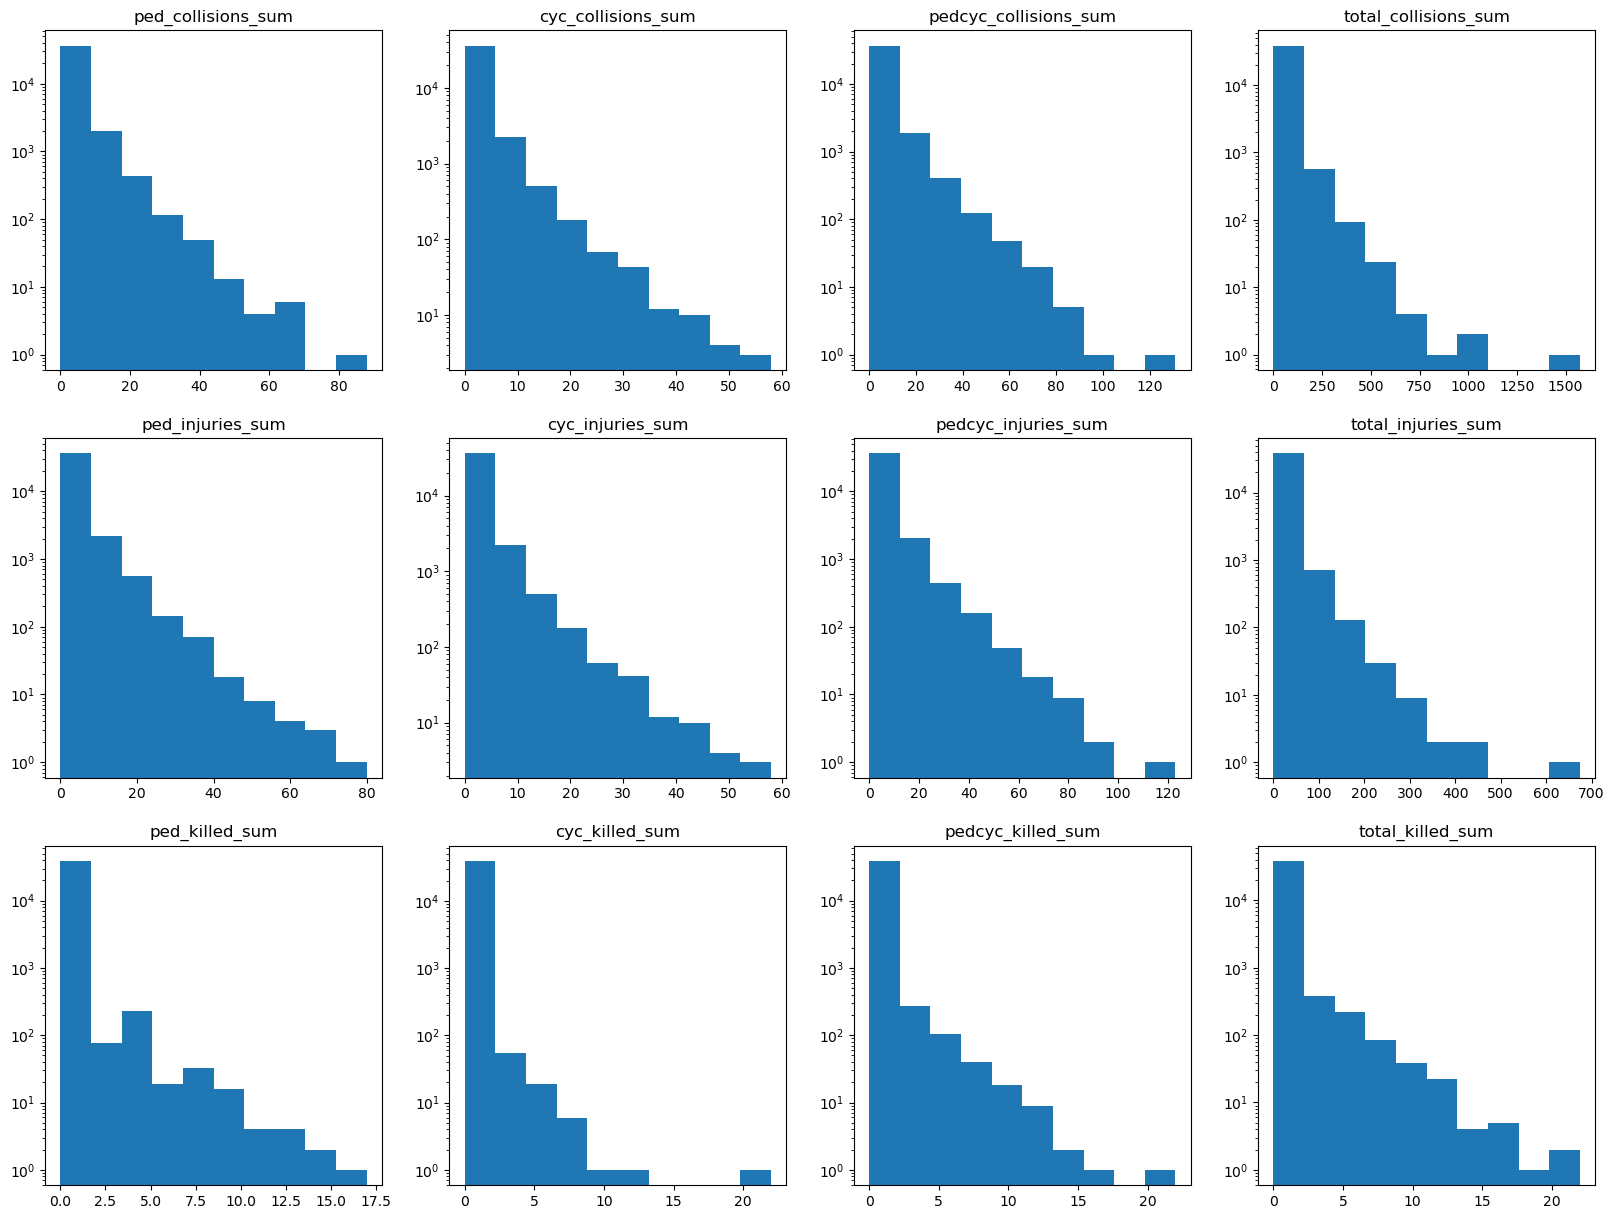

In [44]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for col, ax in zip(new_cols, np.ravel(axes)):
    ax.hist(intersections[col])
    ax.set_title(col)
    ax.set_yscale('log')

plt.show()

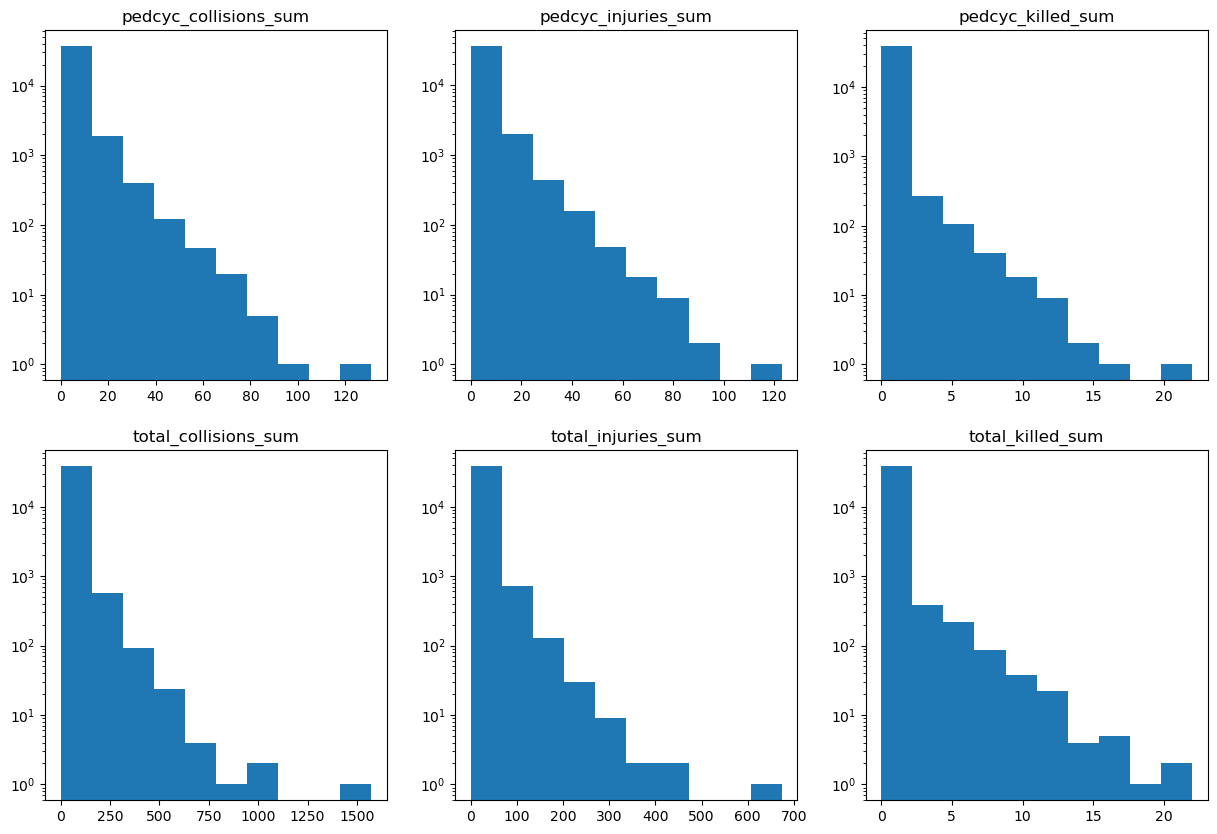

In [45]:
new_cols_summary = [
    'pedcyc_collisions_sum', 'pedcyc_injuries_sum', 'pedcyc_killed_sum',
    'total_collisions_sum', 'total_injuries_sum', 'total_killed_sum'
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for col, ax in zip(new_cols_summary, np.ravel(axes)):
    ax.hist(intersections[col])
    ax.set_title(col)
    ax.set_yscale('log')

plt.show()

# Sample Images

In [46]:
def get_satellite_image(lat, lon, zoom=20, size="640x640", map_type="satellite", api_key=maps_api_key):
    base_url = "https://maps.googleapis.com/maps/api/staticmap"
    params = {
        "center": f"{lat},{lon}",
        "zoom": zoom,
        "size": size,
        "maptype": map_type,
        "key": api_key
    }
    response = requests.get(base_url, params=params)
    image = Image.open(BytesIO(response.content))
    return image

Lenox Ave and Dr Martin Luther King Jr Blvd -- New York


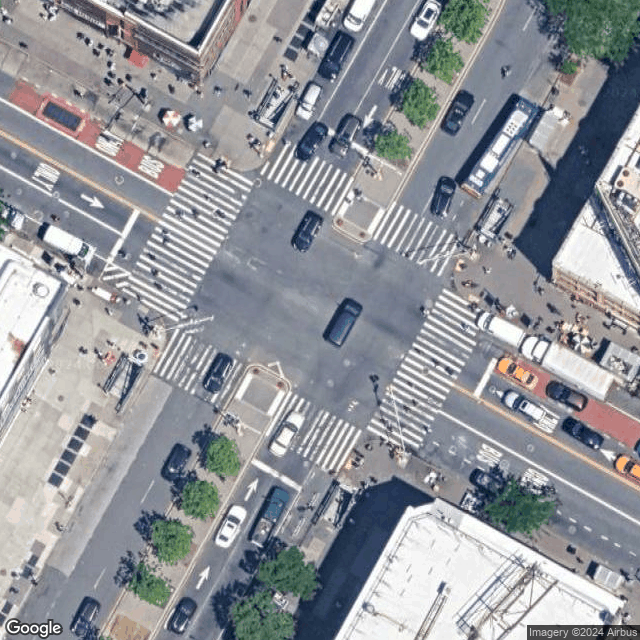

W 145th St and Frederick Douglass Blvd -- New York


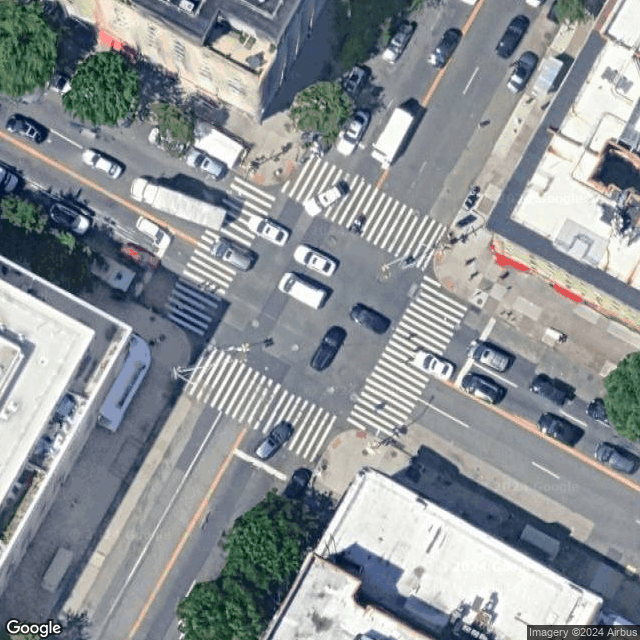

Myrtle Ave and Broadway -- Kings


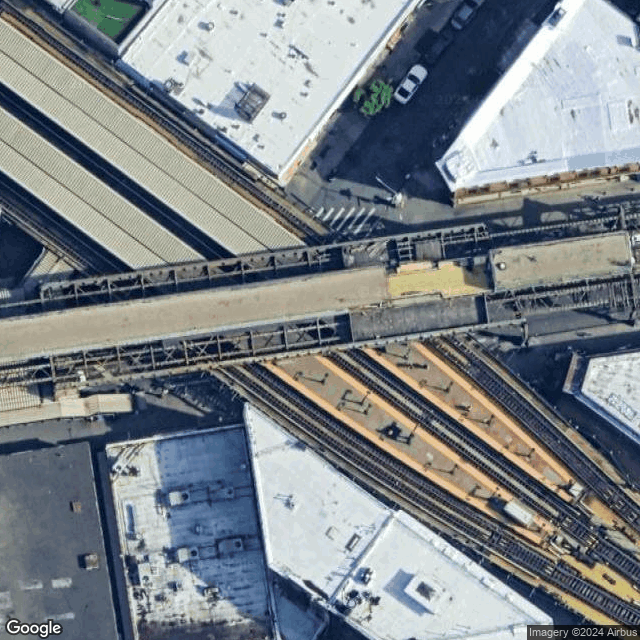

E 58th St and 2nd Ave -- New York


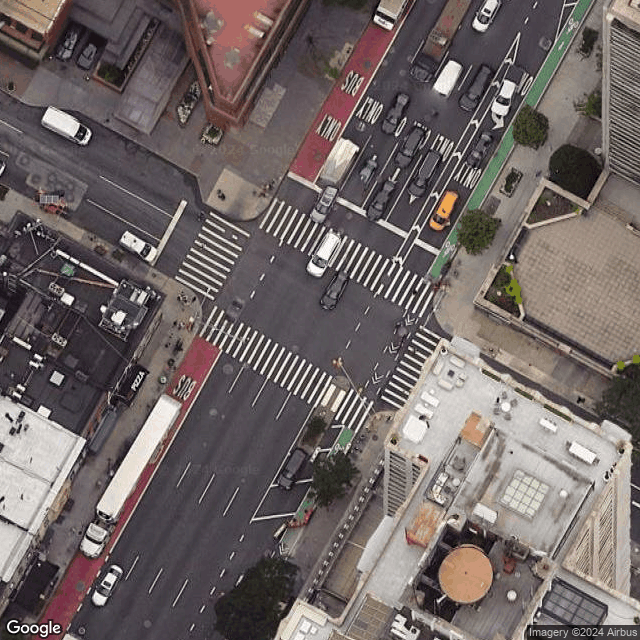

Grand St and Chrystie St -- New York


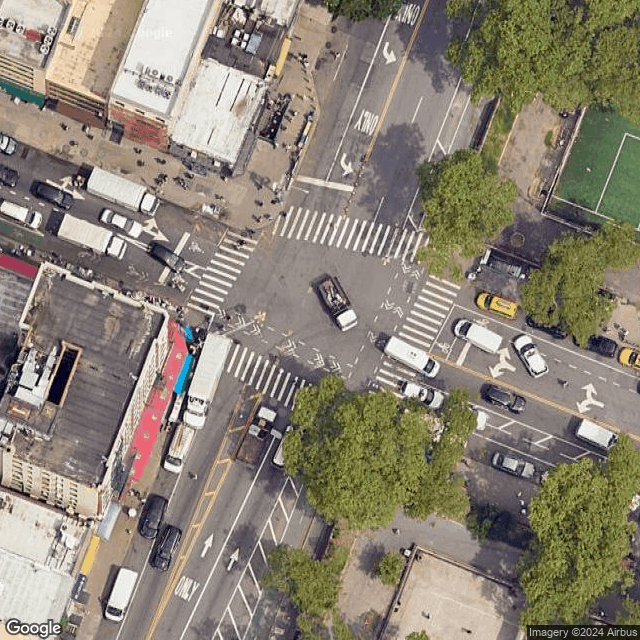

Broadway and Flushing Ave -- Kings


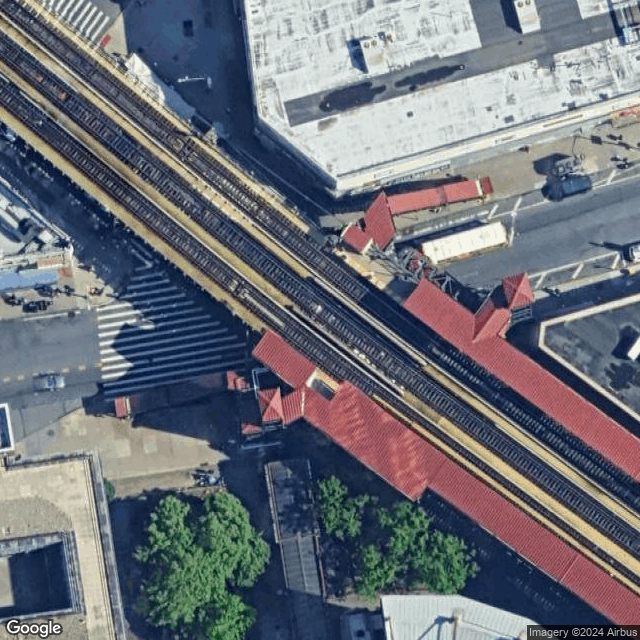

Amsterdam Ave and Dr Martin Luther King Jr Blvd -- New York


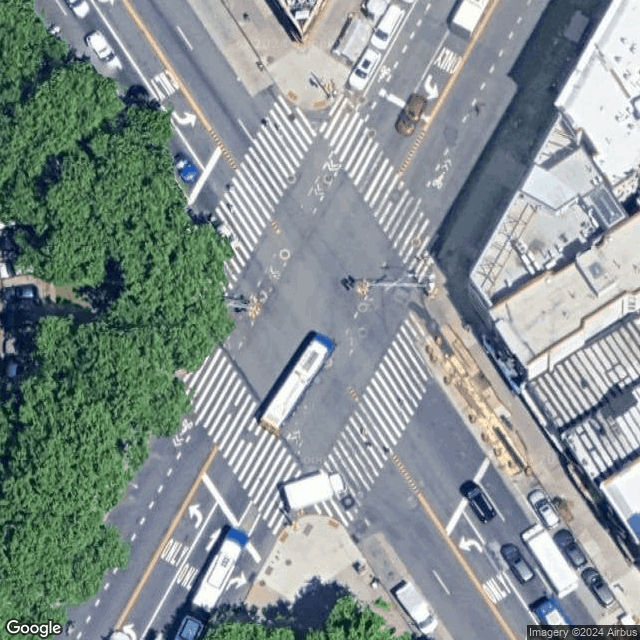

Adam Clayton Powell Jr Blvd and W 145th St -- New York


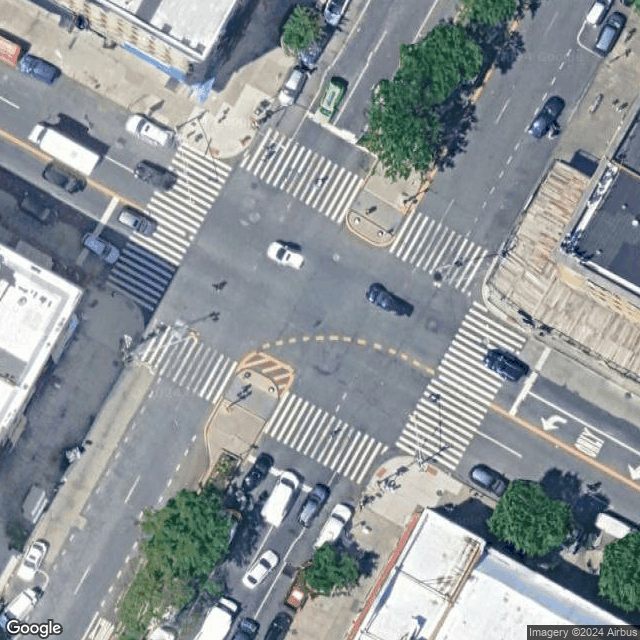

Adam Clayton Powell Jr Blvd and W 135th St -- New York


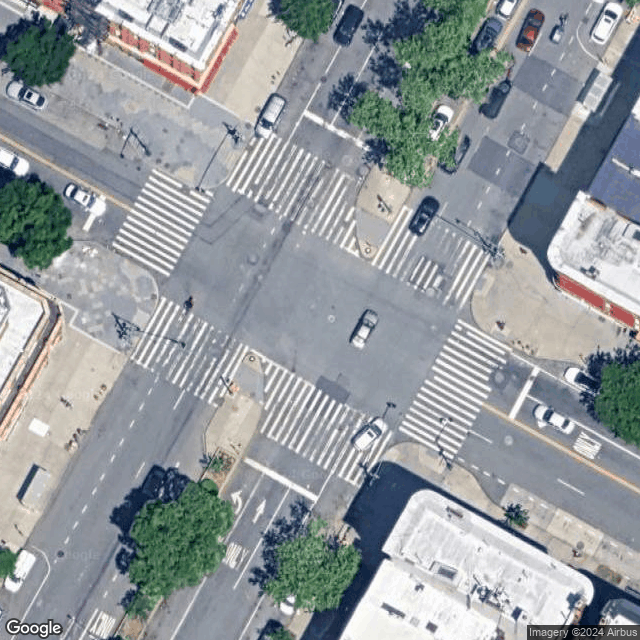

Adam Clayton Powell Jr Blvd and Dr Martin Luther King Jr Blvd -- New York


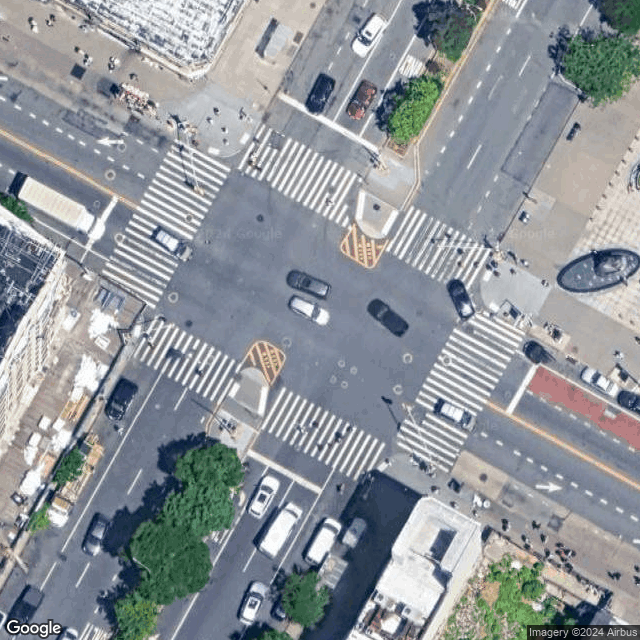

In [47]:
for i, row in intersections.sort_values(by='pedcyc_collisions_sum', ascending=False).head(10).iterrows():
    # record = intersections.iloc[i]
    img = get_satellite_image(row.lat_int, row.lng_int, size="640x640")
    
    print(f'{row.street1} and {row.street2} -- {row.adminName2}')
    display(img)